# Challenge Telecom X

## 📖 Librerias.

In [1]:
#Aqui pondremos todas las librerias que se usarán en el challenge.

#Para el manejo de los datos.
import pandas as pd
import numpy as np

#Para balancear la proporción en churn.
from sklearn.utils import resample

#Para visualizar los datos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 📌 1. Extracción y verificación de los datos.

In [2]:
#Leemos los datos que subimos previamente al repositorio de github.
archivo_telecomx = 'https://raw.githubusercontent.com/alfiejn19/ChallengeTelecomX-Parte2-/refs/heads/main/df_telecom_nz.csv'
df_telecom = pd.read_csv(archivo_telecomx)
df_telecom.head()

,Cliente_ID,Churn,Genero,Jubilado,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Lineas_Multiples,Seguridad_Online,...,Servicio_Internet_DSL,Servicio_Internet_Fibra_Optica,No_Servicio_Internet,Tipo_Contrato_Mensual,Tipo_Contrato_Anual,Tipo_Contrato_Dos_Anos,Metodo_Pago_Transferencia_Bancaria(A),Metodo_Pago_Tarjeta_Credito(A),Metodo_Pago_Cheque_Electronico(A),Metodo_Pago_Cheque_Mensajeria
0,0002-ORFBO,0,0,0,1,1,9,1,0,0,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,0,1,0,0,0,9,1,1,0,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,1,1,0,0,0,4,1,0,0,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,1,1,1,1,0,13,1,0,0,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,1,0,1,1,0,3,1,0,0,...,False,True,False,True,False,False,False,False,False,True


### 1.1. Eliminamos las columnas irrelevantes.

In [3]:
#Eliminamos la columna 'Cliente_ID' pues no aporta información a nuestro objetivo.
df_telecom=df_telecom.drop(columns=['Cliente_ID'], axis=1)
df_telecom.head()

,Churn,Genero,Jubilado,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Lineas_Multiples,Seguridad_Online,Copia_Online,...,Servicio_Internet_DSL,Servicio_Internet_Fibra_Optica,No_Servicio_Internet,Tipo_Contrato_Mensual,Tipo_Contrato_Anual,Tipo_Contrato_Dos_Anos,Metodo_Pago_Transferencia_Bancaria(A),Metodo_Pago_Tarjeta_Credito(A),Metodo_Pago_Cheque_Electronico(A),Metodo_Pago_Cheque_Mensajeria
0,0,0,0,1,1,9,1,0,0,1,...,True,False,False,False,True,False,False,False,False,True
1,0,1,0,0,0,9,1,1,0,0,...,True,False,False,True,False,False,False,False,False,True
2,1,1,0,0,0,4,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3,1,1,1,1,0,13,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
4,1,0,1,1,0,3,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


> **Nota:** En el tratamiento de datos de la parte 1, usamos dummies para las variables categóricas.

### 1.2. Proporción de la tasa de abandono.

In [4]:
#Contamos los clientes que permanecen y los que abandonaron.
# 0 ----> Permanece
# 1 ----> Abandono
df_telecom['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


> **Nota:** Los datos estan desbalanceados.

In [5]:
#Haremos oversampling para balancear la proporción de abandono.
#Separamos las clases.
df_permanece=df_telecom[df_telecom.Churn==0]
df_abandono=df_telecom[df_telecom.Churn==1]

#Hacemos mas grande la clase de abandono (Al tamaño de la clase de permanece).
df_abandono_mas=resample(df_abandono,
                              replace=True,
                              n_samples=len(df_permanece),
                              random_state=42)

#Combinamos la nueva clase con la anterior.
df_telecom_balanceado=pd.concat([df_permanece, df_abandono_mas])

#Verificamos la nueva proporción.
df_telecom_balanceado['Churn'].value_counts()

,count
Churn,
0,5163
1,5163


> **Nota:** Los datos ahora estan balanceados.

### 1.3. Verificamos si el dataset necesita algun tratamineto extra.

In [6]:
df_telecom_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10326 entries, 0 to 5455
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  10326 non-null  int64  
 1   Genero                                 10326 non-null  int64  
 2   Jubilado                               10326 non-null  int64  
 3   Pareja                                 10326 non-null  int64  
 4   Dependientes                           10326 non-null  int64  
 5   Meses_Contrato                         10326 non-null  int64  
 6   Servicio_Telefono                      10326 non-null  int64  
 7   Lineas_Multiples                       10326 non-null  int64  
 8   Seguridad_Online                       10326 non-null  int64  
 9   Copia_Online                           10326 non-null  int64  
 10  Proteccion_Dispositivo                 10326 non-null  int64  
 11  Soporte_

> **Nota:** Nuestro dataframe esta listo para usarse.

## 🎯 2. Correlación y selección de variables.

### 2.1. Matriz de correlación.

,Churn
Churn,1.000000
Tipo_Contrato_Mensual,0.487673
Servicio_Internet_Fibra_Optica,0.338776
Metodo_Pago_Cheque_Electronico(A),0.325578
Facturacion_Electronica,0.222940
Cuenta_Mensual,0.221034
Cuenta_Diaria,0.221034
Jubilado,0.158328
Streaming_TV,0.070753
Streaming_Peliculas,0.068090


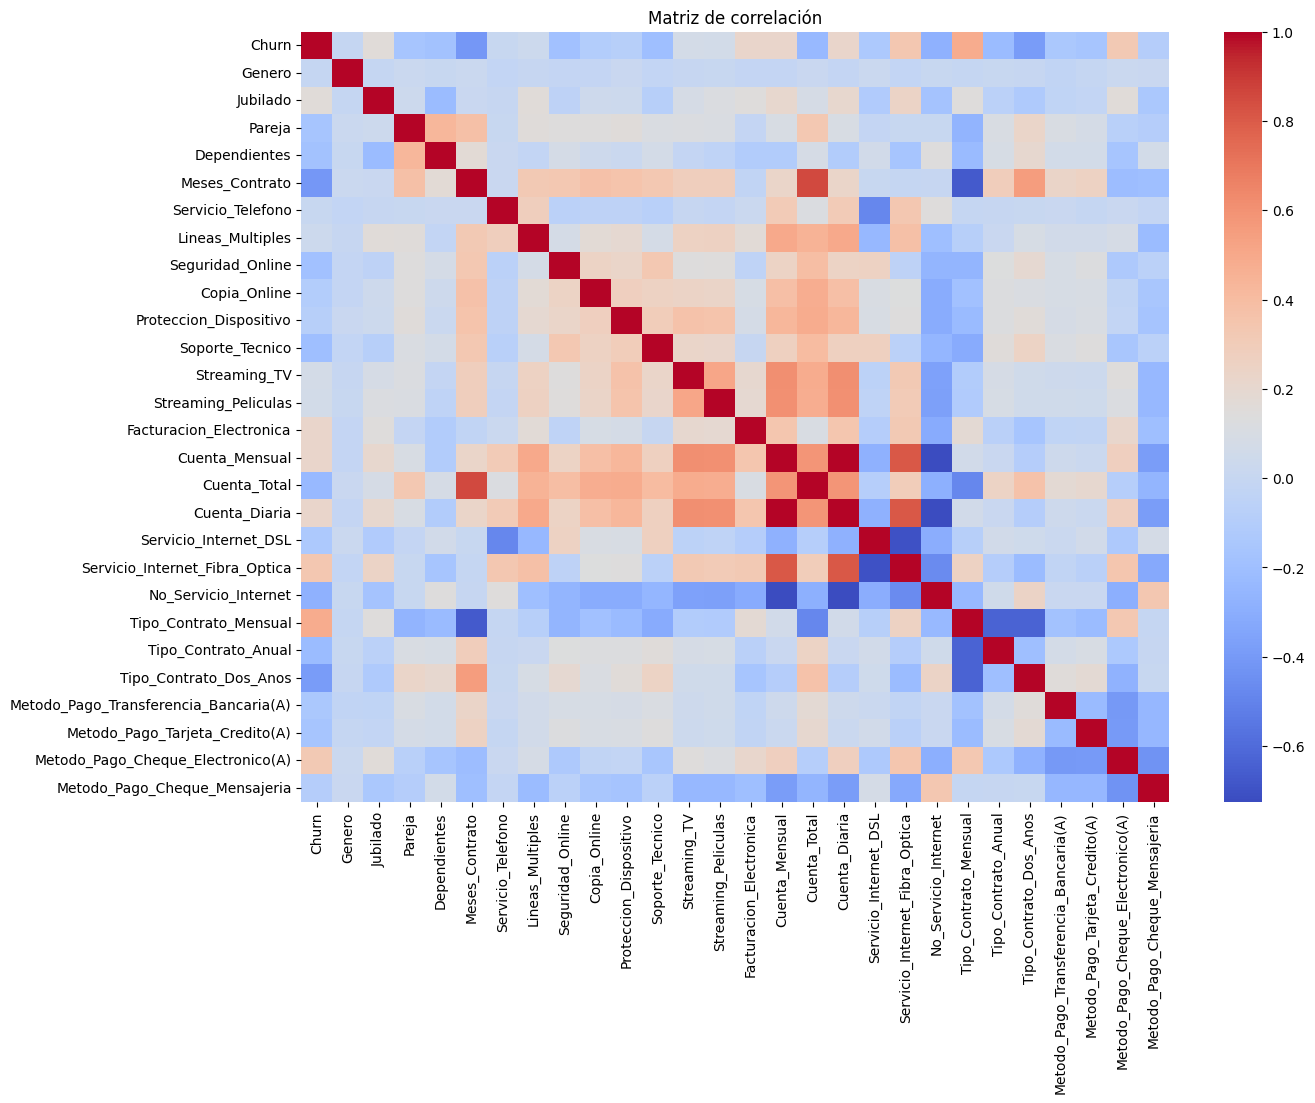

In [7]:
#Creamos la matriz de correlación de las variables.
matriz_corr=df_telecom_balanceado.corr()

#Mostramos la matriz con 'Churn'.
display(matriz_corr['Churn'].sort_values(ascending=False))

#Observamos la matriz con un mapa de calor.
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_corr, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

>**Nota:** Nos enfocaremos en las variables que tienen mayor correlacíon con 'churn' (Positiva y negativa).

In [8]:
#Definimos una cota para seleccionar la importancia de la correlación.
cota_correlacion=0.2

#Obtenemos la correlación de todas las variables con 'churn' (Con valor absoluto).
churn_correlacion=matriz_corr['Churn'].abs()

#Seleccionamos las variables con correlación mayor a la cota.
variables_importantes=churn_correlacion[churn_correlacion>cota_correlacion].index.tolist()

#Mostramos las variables seleccionadas.
df_telecom_bsv=df_telecom_balanceado[variables_importantes]
df_telecom_bsv.sample(5)

,Churn,Meses_Contrato,Soporte_Tecnico,Facturacion_Electronica,Cuenta_Mensual,Cuenta_Total,Cuenta_Diaria,Servicio_Internet_Fibra_Optica,No_Servicio_Internet,Tipo_Contrato_Mensual,Tipo_Contrato_Anual,Tipo_Contrato_Dos_Anos,Metodo_Pago_Cheque_Electronico(A)
6714,0,72,1,0,90.45,6565.85,3.015000,True,False,False,False,True,False
64,1,1,0,1,99.75,99.75,3.325000,True,False,True,False,False,True
276,1,60,0,1,95.75,5742.90,3.191667,True,False,True,False,False,True
6372,1,3,1,1,69.35,191.35,2.311667,False,False,True,False,False,True
4915,1,20,0,0,71.30,1389.20,2.376667,True,False,True,False,False,False


,Churn
Churn,1.000000
Tipo_Contrato_Mensual,0.487673
Servicio_Internet_Fibra_Optica,0.338776
Metodo_Pago_Cheque_Electronico(A),0.325578
Facturacion_Electronica,0.222940
Cuenta_Mensual,0.221034
Cuenta_Diaria,0.221034
Soporte_Tecnico,-0.201346
Tipo_Contrato_Anual,-0.222199
Cuenta_Total,-0.237694


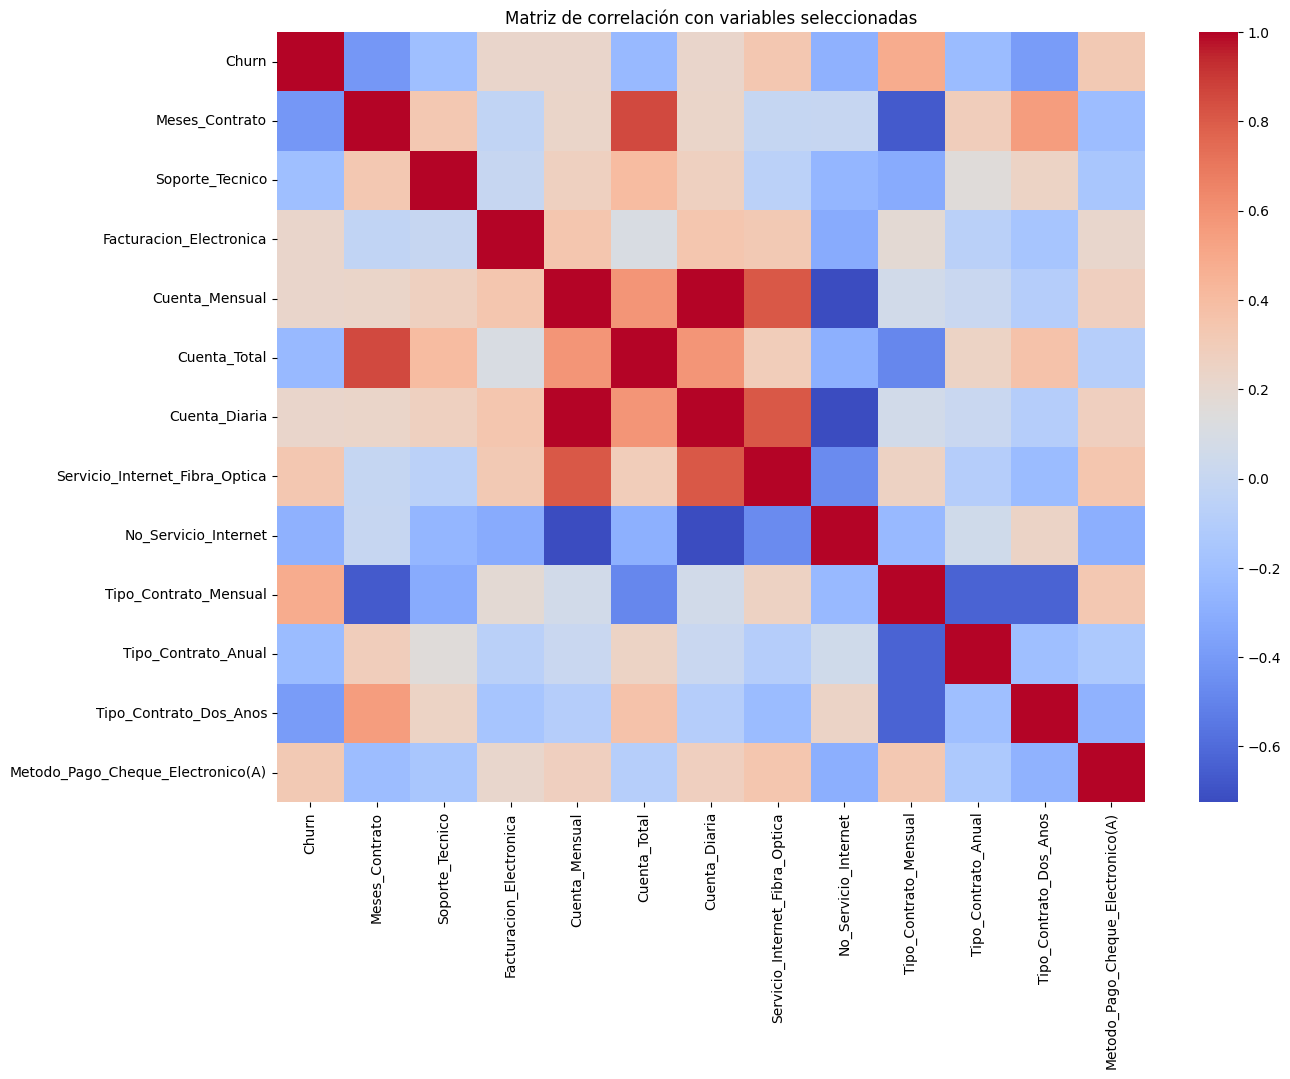

In [9]:
#Creamos la nueva matriz de correlación con las variables seleccionadas.
matriz_corr_sv=df_telecom_bsv.corr()

#Mostramos la matriz con 'Churn'.
display(matriz_corr_sv['Churn'].sort_values(ascending=False))

#Observamos la matriz con un mapa de calor.
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_corr_sv, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación con variables seleccionadas')
plt.show()

### 2.2. Análisis dirigido.

>Crearemos de un boxplot por cada una de las variables continuas y churn.

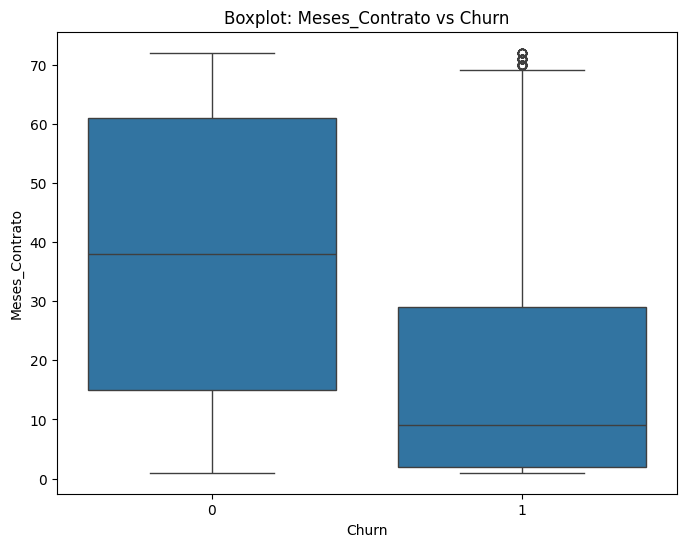

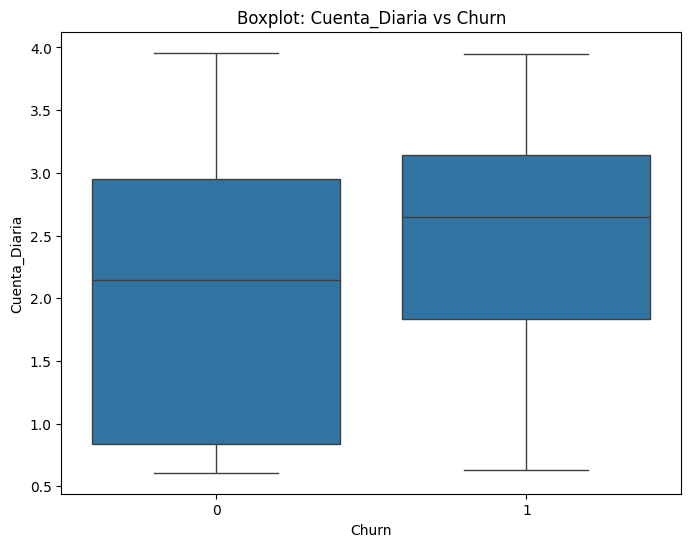

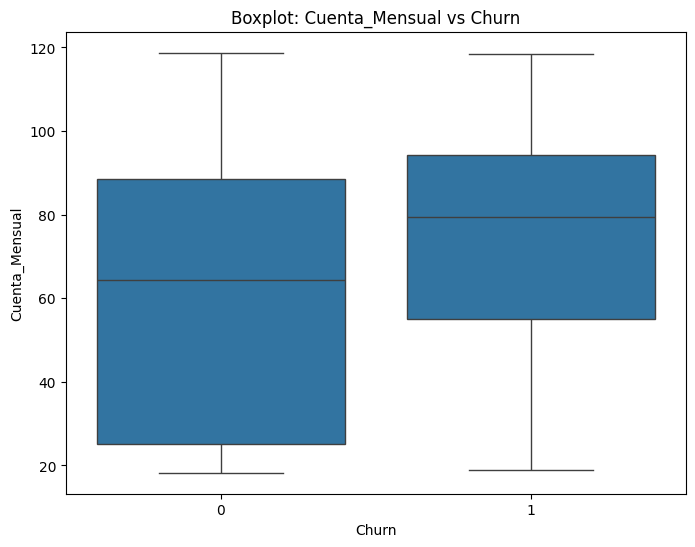

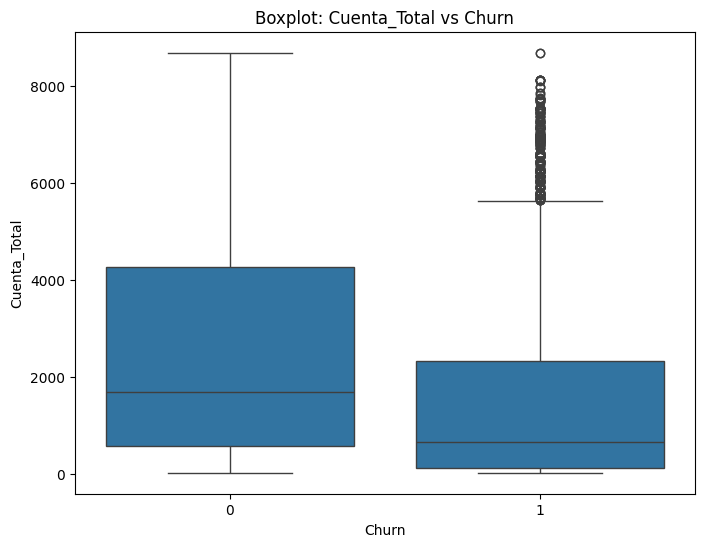

In [19]:
#Creamos una lista con las variables seleccionadas y removemos 'Churn'.
var_seleccionadas=df_telecom_bsv[['Meses_Contrato', 'Cuenta_Diaria', 'Cuenta_Mensual', 'Cuenta_Total']]

#Boxplot (Variables númericas).
for col in var_seleccionadas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_telecom_bsv, x='Churn', y=col)
    plt.title(f'Boxplot: {col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

## 🤖 3. Modelado predictivo.

### 3.1. Dividir los datos entrenamiento/prueba.

In [20]:
#Importamos el modulo de la libreria que necesitamos.
from sklearn.model_selection import train_test_split

In [22]:
#Seleccionamos nuestros atributos y nuestra variable 'objetivo'.
y=df_telecom_bsv['Churn']
X=df_telecom_bsv.drop('Churn', axis=1)

In [23]:
#Dividimos el dataset por entrenamiento/prueba con proporción 70/30.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4321)

### 3.2. Creación de modelos.

>Consideramos que tenemos un problema de clasificación.

#### 3.2.1. KNN.

In [31]:
#Importamos el modelo y el modulo para escalar los datos.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#Estandarizamos los datos.
escala=StandardScaler()
X_train_st=escala.fit_transform(X_train)
X_test_st=escala.transform(X_test)

#Seleccionamos el modelo.
modelo_knn=KNeighborsClassifier()

#Seleccionamos los mejores hiperparametros.
param_grid_knn = {'n_neighbors': np.arange(1, 15),
                  'p': [1, 2]}
##Definimos la rejillas, cazar los valores del param_grid con el modelo.
rejilla_acc=GridSearchCV(modelo_knn, param_grid_knn, scoring='accuracy', cv=10, n_jobs=-1)
rejilla_pre=GridSearchCV(modelo_knn, param_grid_knn, scoring='precision', cv=10, n_jobs=-1)
rejilla_rec=GridSearchCV(modelo_knn, param_grid_knn, scoring='recall', cv=10, n_jobs=-1)
rejilla_f1=GridSearchCV(modelo_knn, param_grid_knn, scoring='f1', cv=10, n_jobs=-1)
#Hacemos la búsqueda.
rejilla_acc.fit(X_train_st,y_train)
rejilla_pre.fit(X_train_st,y_train)
rejilla_rec.fit(X_train_st,y_train)
rejilla_f1.fit(X_train_st,y_train)
#Imprimimos las mejores configuraciones.
print(f'La mejor configuración del hiperparámetro es: {rejilla_acc.best_params_}')
print(f'La mejor métrica obtenida (accuracy): {rejilla_acc.best_score_:.3f}')
print('*'*10)
print(f'La mejor configuración del hiperparámetro es: {rejilla_pre.best_params_}')
print(f'La mejor métrica obtenida (precision): {rejilla_pre.best_score_:.3f}')
print('*'*10)
print(f'La mejor configuración del hiperparámetro es: {rejilla_rec.best_params_}')
print(f'La mejor métrica obtenida (recall): {rejilla_rec.best_score_:.3f}')
print('*'*10)
print(f'La mejor configuración del hiperparámetro es: {rejilla_f1.best_params_}')
print(f'La mejor métrica obtenida (f1): {rejilla_f1.best_score_:.3f}')

La mejor configuración del hiperparámetro es: {'n_neighbors': np.int64(1), 'p': 1}
La mejor métrica obtenida (accuracy): 0.851
**********
La mejor configuración del hiperparámetro es: {'n_neighbors': np.int64(2), 'p': 2}
La mejor métrica obtenida (precision): 0.819
**********
La mejor configuración del hiperparámetro es: {'n_neighbors': np.int64(1), 'p': 1}
La mejor métrica obtenida (recall): 0.916
**********
La mejor configuración del hiperparámetro es: {'n_neighbors': np.int64(1), 'p': 1}
La mejor métrica obtenida (f1): 0.860


In [33]:
from sklearn.model_selection import cross_val_score
from scipy import stats
#Hacemos la validacion cruzada anidada para ver como se comporta nuestro modelo.
#Calificamos el desempeño del mejor modelo.
scores_acc=cross_val_score(rejilla_acc,X_train_st,y_train,scoring='accuracy',cv=10,n_jobs=-1)
scores_pre=cross_val_score(rejilla_pre,X_train_st,y_train,scoring='precision',cv=10,n_jobs=-1)
scores_rec=cross_val_score(rejilla_rec,X_train_st,y_train,scoring='recall',cv=10,n_jobs=-1)
scores_f1= cross_val_score(rejilla_f1,X_train_st,y_train,scoring='f1',cv=10,n_jobs=-1)
#Imprimimos los resultados.
print(f'La mejor métrica(accuracy): {scores_acc.mean():.3f} +/- {stats.sem(scores_acc):.3f}')
print(f'La mejor métrica(precision): {scores_pre.mean():.3f} +/- {stats.sem(scores_pre):.3f}')
print(f'La mejor métrica(recall): {scores_rec.mean():.3f} +/- {stats.sem(scores_rec):.3f}')
print(f'La mejor métrica(f1): {scores_f1.mean():.3f} +/- {stats.sem(scores_f1):.3f}')

La mejor métrica(accuracy): 0.850 +/- 0.004
La mejor métrica(precision): 0.819 +/- 0.005
La mejor métrica(recall): 0.916 +/- 0.004
La mejor métrica(f1): 0.859 +/- 0.003


> **IMPORTANTE:** En base a nuestras métricas, podemos ver que la mejor configuración de los hiperparametros es 1 vecinos y la métrica del taxista.
Además nuestro modelo no esta sobre-entrenado.

In [34]:
#Entrenamos nuestro modelo.
modelo_knn=KNeighborsClassifier(n_neighbors=1, p=1)
modelo_knn.fit(X_train_st,y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [35]:
#Predecimos nuestros datos de prueba.
y_pred_knn=modelo_knn.predict(X_test_st)

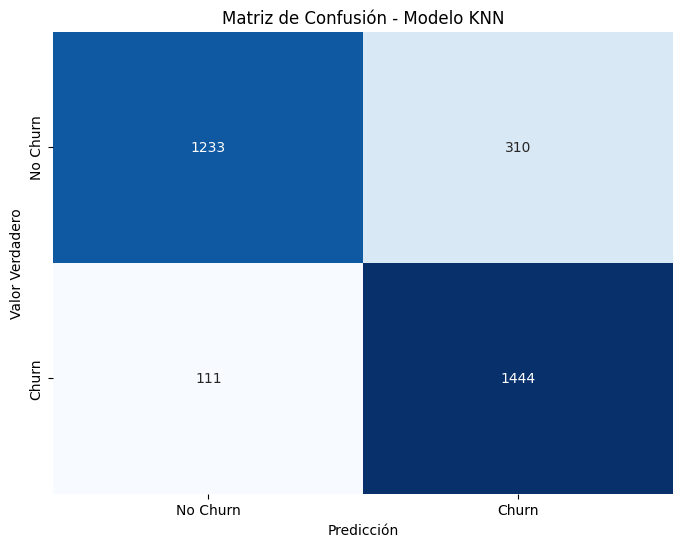

In [40]:
#Observamos la matriz de confusión con nuestras predicciones.
from sklearn.metrics import confusion_matrix
matriz_confusion=confusion_matrix(y_test, y_pred_knn)

#Gráficamos la matriz.
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.title('Matriz de Confusión - Modelo KNN')
plt.show()

#### 3.2.2. RandomForest.

In [42]:
#Importamos el modelo y el modulo para escalar los datos.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Seleccionamos el modelo.
modelo_rf=RandomForestClassifier()

#Seleccionamos los mejores hiperparametros.
param_grid_rf = {'max_depth': np.arange(1, 10)}

##Definimos la rejillas, cazar los valores del param_grid con el modelo.
rejilla_acc=GridSearchCV(modelo_rf, param_grid_rf, scoring='accuracy', cv=10, n_jobs=-1)
rejilla_pre=GridSearchCV(modelo_rf, param_grid_rf, scoring='precision', cv=10, n_jobs=-1)
rejilla_rec=GridSearchCV(modelo_rf, param_grid_rf, scoring='recall', cv=10, n_jobs=-1)
rejilla_f1=GridSearchCV(modelo_rf, param_grid_rf, scoring='f1', cv=10, n_jobs=-1)
#Hacemos la búsqueda (No necesitamos escalar los datos).
rejilla_acc.fit(X_train,y_train)
rejilla_pre.fit(X_train,y_train)
rejilla_rec.fit(X_train,y_train)
rejilla_f1.fit(X_train,y_train)
#Imprimimos las mejores configuraciones.
print(f'La mejor configuración del hiperparámetro es: {rejilla_acc.best_params_}')
print(f'La mejor métrica obtenida (accuracy): {rejilla_acc.best_score_:.3f}')
print('*'*10)
print(f'La mejor configuración del hiperparámetro es: {rejilla_pre.best_params_}')
print(f'La mejor métrica obtenida (precision): {rejilla_pre.best_score_:.3f}')
print('*'*10)
print(f'La mejor configuración del hiperparámetro es: {rejilla_rec.best_params_}')
print(f'La mejor métrica obtenida (recall): {rejilla_rec.best_score_:.3f}')
print('*'*10)
print(f'La mejor configuración del hiperparámetro es: {rejilla_f1.best_params_}')
print(f'La mejor métrica obtenida (f1): {rejilla_f1.best_score_:.3f}')

La mejor configuración del hiperparámetro es: {'max_depth': np.int64(9)}
La mejor métrica obtenida (accuracy): 0.819
**********
La mejor configuración del hiperparámetro es: {'max_depth': np.int64(9)}
La mejor métrica obtenida (precision): 0.781
**********
La mejor configuración del hiperparámetro es: {'max_depth': np.int64(1)}
La mejor métrica obtenida (recall): 0.883
**********
La mejor configuración del hiperparámetro es: {'max_depth': np.int64(9)}
La mejor métrica obtenida (f1): 0.828


In [43]:
#Hacemos la validacion cruzada anidada para ver como se comporta nuestro modelo.
#Calificamos el desempeño del mejor modelo.
scores_acc=cross_val_score(rejilla_acc,X_train,y_train,scoring='accuracy',cv=10,n_jobs=-1)
scores_pre=cross_val_score(rejilla_pre,X_train,y_train,scoring='precision',cv=10,n_jobs=-1)
scores_rec=cross_val_score(rejilla_rec,X_train,y_train,scoring='recall',cv=10,n_jobs=-1)
scores_f1= cross_val_score(rejilla_f1,X_train,y_train,scoring='f1',cv=10,n_jobs=-1)
#Imprimimos los resultados.
print(f'La mejor métrica(accuracy): {scores_acc.mean():.3f} +/- {stats.sem(scores_acc):.3f}')
print(f'La mejor métrica(precision): {scores_pre.mean():.3f} +/- {stats.sem(scores_pre):.3f}')
print(f'La mejor métrica(recall): {scores_rec.mean():.3f} +/- {stats.sem(scores_rec):.3f}')
print(f'La mejor métrica(f1): {scores_f1.mean():.3f} +/- {stats.sem(scores_f1):.3f}')

La mejor métrica(accuracy): 0.819 +/- 0.006
La mejor métrica(precision): 0.780 +/- 0.006
La mejor métrica(recall): 0.873 +/- 0.006
La mejor métrica(f1): 0.829 +/- 0.005


>**IMPORTANTE:** En base a nuestras métricas, podemos ver que la mejor configuración de los hiperparametros es con profundidad maxima 9.
Además nuestro modelo no esta sobre-entrenado.

In [44]:
#Entrenamos nuestro modelo.
modelo_rf=RandomForestClassifier(max_depth=9)
modelo_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9)

In [45]:
#Predecimos nuestros datos de prueba.
y_pred_rf=modelo_rf.predict(X_test_st)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


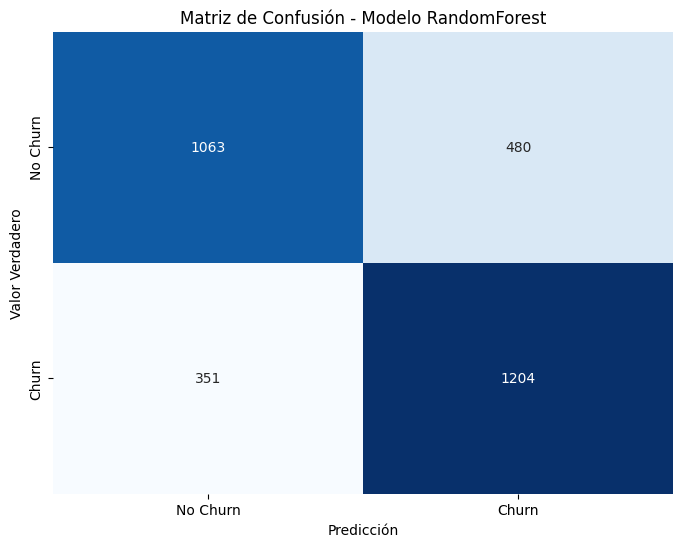

In [46]:
#Observamos la matriz de confusión con nuestras predicciones.
from sklearn.metrics import confusion_matrix
matriz_confusion=confusion_matrix(y_test, y_pred_rf)

#Gráficamos la matriz.
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.title('Matriz de Confusión - Modelo RandomForest')
plt.show()

### 3.4. Importancia de los atributos.


In [48]:
#Observemos por orden la importancia de los atributos con RandomForest.
Importancias_rf=pd.DataFrame()
Importancias_rf["Atributo"]=X.columns
Importancias_rf["Importancia"]=modelo_rf.feature_importances_
Importancias_rf.sort_values(by="Importancia",ascending=False)

,Atributo,Importancia
8,Tipo_Contrato_Mensual,0.182522
0,Meses_Contrato,0.166762
4,Cuenta_Total,0.132841
3,Cuenta_Mensual,0.110142
5,Cuenta_Diaria,0.098503
10,Tipo_Contrato_Dos_Anos,0.091352
6,Servicio_Internet_Fibra_Optica,0.076881
11,Metodo_Pago_Cheque_Electronico(A),0.047516
9,Tipo_Contrato_Anual,0.029817
7,No_Servicio_Internet,0.028474


## 🔷 4. Informe final.

 ### **Objetivo.**
 Crear una conclusión estratégica señalando los principales factores que influyen en la tasa de abandono.

> Como observamos en la pare 1 del rato, la tasa de abandono de los clientes era mas del 20%. En este informe discutiremos los principales atributos del por que los clientes permanecen o no.

### **¿Como llegamos a una conclusión?**

### Tratamiento de los datos.

1. Subimos el archivo al repositorio de github para poder exportarlo en este notebook.
2. Eliminamos el ID de cada cliente pues no aportaba información para nuestro objetivo.
3. Verificamos de nuevo si nuestro dataset requeria algún tratamiento extra.
4. Notamos que nuestros datos estaban desbalanceados y procedimos con oversampling.

### Correlación con el objetivo.

La variable objetivo era: 'Churn'. Por lo que en esta etapa identifificamos la correlación con el objetivo. Seleccionamos las variables que tuvieran una mayor correlación a partir de una cota y consideramos lo necesario.

### Modelado de datos.

En esta parte seleccionamos los dos modelos que usaremos para trabajar y dividimos nuestros datos en entrenamiento/prueba.

#### KNN
El modelo de vecinos mas cercanos se construyo desde la estandarización de los datos y despues de la calibración, nuestro modelo optimo fue de 1 vecino con la métrica del taxista. Al evaluarlo notamos que no presentaba sobre-entrenamiento en ninguno de nuestras métricas.
La matriz de confusión nos dio perspectiva de que eran ciertas las métricas plasmadas.

#### RandomForest.

En este modelo no se requierió la estandarización de datos, calibramos la profundidad optima de cada árbol y el modelo óptimo mostro que su profundidad máxima debia ser 9. No se noto sobreentrenamiento en las métricas y la matriz de confusión mosttró un desempeño pero que el modelo KNN.

### Conclusión.

En base a las importancias de los atributos y los resultados obtenidos en nuestros modelos predictivos, la empresa debe enfocarse en que la tasa de abandona sube cuando el cliente tiene un contrato mensual y se correlaciona con los meses de contrato pues a menor cantidad de meses de permanencia, mayor cantidad de abandonos. Un factor importante a mencionar es que si el costo diario y mensual es alto los clientes también tienen mayor probabilidad de abandonar la empresa, sobretodo si son nuevos.

La recomendación es que los cliente ya existentes con contratos mesnuales y costos diarios altos se deben cambiar a contratos anuales y los nuevos clientes deben ingresar con un costo diario bajo si es que deciden tener un contrato mensual.